Learning Outcomes
- Identify and illustrate the legal and ethical issues around the use of supervised machine learning
- Identify formulate and apply the basic processes of supervised machine learning
- Understand the role of data in estimating accuracy 
Lectures: recap then
- 15 minutes: basic model building process: train and test (Validation and model selection are in L2)
- Activity:
- 15 minutes:  types of model: instance-based (kNN) vs explicit (decision trees,rules) 
- Activity:
- 15 minutes: Exaxmple-  greedy rule induction as compared to expert system
- Activity:



# Supervised Machine Learning
### Artificial Intelligence 1, Week 6


### Learning models for **classification** or **regression** from a set of labelled instances.

# This week
Learning outcomes:
- Identify and illustrate the legal and ethical issues around the use of supervised machine learning
- Identify formulate and apply the basic processes of supervised machine learning
- Understand the role of data in estimating accuracy 

Lectures:
- Basic model building process: train and test 
- Types of model: instance-based ( e.g. kNN) vs explicit (e.g. decision trees,rules, ...) 
- Example:   greedy rule induction as compared to expert system



# Machine Learning Paradigm
- Completely different paradigm to symbolic AI
- Create a system with the ability to learn
- Present the system with series of examples
- System builds up its own model of the world



<img src="figures/ML/PersonThinkingAboutDogs.png" syle="float:left" width = 300>
<img src="figures/ML/idealisedDog.png" style="float:right">


## Video (6:52): Hello World of Machine Learning Recipes


https://youtu.be/cKxRvEZd3Mw


## It's all about the data
- Computers cannot experience artefacts of the real world directly
- Instead they just deal with a few variables that represent them
- ML algorithms learn from a “training set” containing digital representations of examples to learn from
- Outcomes depend entirely on:
 - What you choose to measure
 - And how representative your training set is
 
 Formally ML algorithms learn a mappingh from a 


## Example: Top Trumps for Cats and Dogs! 
<img src="figures/ML/TopTrumps.png" >

## More formally

We have a set of *n* examples., and for each one  we have: 
- a value for each of *f* features 
- a label

If the label comes from a discrete unordered set e.g.  ("Cat", "Dog") we have a **Classification** problem  
If the label is an ordinal value (integer,    floating point) we have a **Regression** problem. 

The data set *X* is a 2-D array of *n* rows and *f* columns. 
The label set *y* is a 2D array with *n* entries

### The next slide illustrates this for the Cats and Dogs dataset

In [71]:
import numpy as np
import matplotlib.pyplot as plt

def show_scatterplot_matrix(X,y,featureNames):
    f = X.shape[1]
    if(len(y) != X.shape[0]):
        print("Error,   the y array  must have the same length as there are rows in X")
        return
    fig, ax = plt.subplots(f,f,figsize=(12,12))
    plt.set_cmap('Spectral')
    for feature1 in range(f):
        ax[feature1,0].set_ylabel( featureNames[feature1])
        ax[0,feature1].set_xlabel( featureNames[feature1])
        ax[0,feature1].xaxis.set_label_position('top') 
        for feature2 in range(f):
            xdata = X[:,feature1]
            ydata = X[:,feature2]
            ax[feature1, feature2].scatter(xdata,ydata,c=y)
            
            

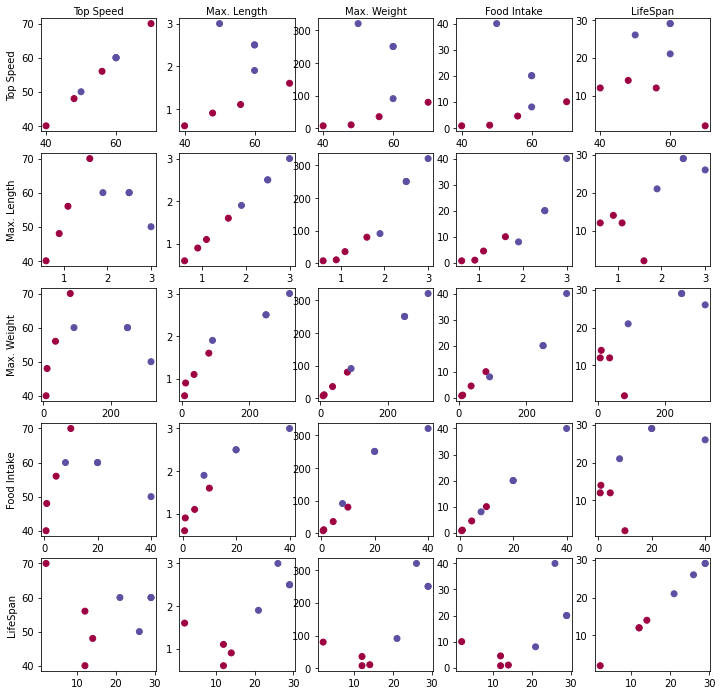

In [72]:
columnLabels = ["Top Speed","Max. Length", "Max. Weight","Food Intake","LifeSpan"]

X = np.empty((8,5)) 
X[0] = [48,0.9,11,1,14]   # Red Fox
X[1] = [40,0.6,8,0.75,12] # Arctic Fox
X[2] = [60,2.5,250,20,29] # Jaguar
X[3] = [60,2.5,250,20,29] # Lion
X[4] = [70,1.6,80,10,2]  # "Grey Wolf"
X[5] = [56,1.1,36,4.5,12] # "African Wild Dog"
X[6] = [60,1.9,91,8,21] # Leopard
X[7] = [50,3,320,40,26] # Tiger

y = [0,0,1,1,0,0,1,1] # y[i] will be 1 for cat,  0 for dog
show_scatterplot_matrix(X,y,columnLabels)

## Machine Learning Algorithms
Typically a ML method consists of:

1: A  representation for the decision boundaries
 - Each different arrangement of boundaries defines a unique model
 - Each unique model is defined by the set of values for variables specifying where they are
 
2: A learning algorithm to deciding how to change values to move between models

ML Algorithms build models in different ways
- but they don’t care what it is they are grouping
 - and its meaningless to say they “understand”.


## Some example ML methods
The field of ML is fast growing and contains many complex methods and representations
In this module I will just focus on a few simple ideas to give you a feel for what is out there.  
- Instance-based learning (k-Nearest Neighbours) - this week
- Decision trees and rule induction algorithms- this week
- Artificial Neural Networks - weeks 7 and 8

Next year: 
- Artificial Intelligence 2:  15 credits, semester 1 (AI and "General" pathways)
and in particular
- Machine Learning: 15 credits, semester 2     ( AI pathway)

will cover more algorithms in greater depth.


## Instance-based Methods: Nearest Neighbour Methods
- Do not explicitly represent class boundaries  
  Construct them “on-the-fly” when queried
- Store the set of training examples  
  More efficient methods may not store all points
- Use a metric to calculate distance between two points  
  e.g. Euclidean (continuous), Hamming (binary), ...


In [ ]:
Voronoi tesselation of animals

## K-Nearest Neighbour Classification <img src="figures/ML/voronoi.png" style="float:right">

**init()**
- Decide on a distance metric d(i,j) to measure how far apart two items *i* and *j* are  
  could be Euclidean disitance if features are continous variables  
   or Hamming distances if they are categorical   

**Fit(trainingData):**
 - just store a local copy of the training data as two arrays:
  -  X<sub>train</sub> of size (N * numFeatures),   y<sub>train</sub> of size( N * 1)
 - Also make a note of the min and max values for each variable/feature so we can normalise the data
  - 1D arrays min and max of size (numFeatures * 1)

**Predict(newItems)**      
1. Make 2D array distances of size (num_newItems * N)  
   and 1D predictions array y<sub>pred</sub> of size num_newItems
2. For each newItem i
 - for each trainingitem j
   - set distances[i][j] = d (i,j)
 - find the *k* columns for row i with the smallest values
 - get the corresponding *k* labels from y<sub>train</sub>
 - set y<sub>pred</sub>[i] = most common label from the k
 
Image adapted from Vornoi tesselatio for kNN from https://kevinzakka.github.io/2016/07/13/k-nearest-neighbor


In [115]:
# Example for K = 1 
from sklearn.metrics.pairwise import euclidean_distances
class simple_1NN:

    def fit(self,X,y):
        self.numExemplars = X.shape[0]
        self.numFeatures = X.shape[1]
        self.modelX = X
        self.modelY = y
        
    def predict(self,newItems):
        numToPredict = newItems.shape[0]
        yPred = np.empty((numToPredict,1))
        dist = euclidean_distances(newItems,self.modelX)
        closest = np.argmin(dist, axis=1) 
        for item in range (numToPredict):
            yPred[item] = self.modelY [ closest[item]]
        return yPred


In [116]:
# Scottish wildcat 14kg, 0.8m, 48kph, 8 years, 1.5kg food a day

model = simple_1NN()
model.fit(X,y)

newAnimals = np.empty((2,5))
scottish_wildcat = np.array([14,0.8,48,8,1.5])
newAnimals[0] = scottish_wildcat

prediction = model.predict(newAnimals)

if(prediction[0]==0):
    print(" the scottish wildcat is a dog")
else:
    print(" the scottish wildcat is a cat")



 the scottish wildcat is a dog


## What are the problems here?

1. Some variables (e.g. weight) have bigger ranges that otherrs so dominate the distance calculation
 - solve this by **normalising** the data so that each feature is mapped onto the range [0-1]
 
2.   Our training data is not verey representative
 - it doesn't even include the house cat!
 
Problem 1 can be addressed by algorithmic methods  - and is standard practice

Problem 2 can only be addressed by good practice.  
It relates to the issues of:
- **Fairness**:  big cats may be exciting but they are not representative of cats as whole
- **Accountability**: can you explain the decision.  
  Actually "for these features a wildcat is most like a red fox" is not too bad
- **Trust**: can you make a convincing argument that you have carefully chosen the right examples **and features**

## Rule Induction Algorithms
- Most existing algorithms tend to use rules built up of lots of axis-perpendicular decisions.  e.g.,*If( maxWeight > 100) THEN ("cat")*   
  Draws a line through feature space, perpendicular to the maxWeight axis, crossing it at 100.  
  Puts the label "Cat" on one side, "Dog" on the other

- As more rules are added, the model effectively builds labelled (hyper) boxes in space.  
  Rest of space is given with the default (majority) label

- For classification, we have fixed sets of features,operators, and outputs, and can discretize the thresholds for each feature.  
  So we can **algorithmically** generate all the possible rules as tuples of {feature_id,operator_id,threshold_id, label_id}
  - Typically exploit this in a greedy constructive hill climbing approach:  
    Repeatedly generate all the rules we could add to existing set of rules (model),   
    Then select and adding the one that discriminates most of the remaining unclassified data 



## Example for cats and dogs in 2D <img src="figures/ML/cat-dogs-rules.png" style="float:right" width=500>
Chart shows scatter plot of lifespan (y) vs top speed 

Start by adding rule that classifies most examples: 
- **if(lifespan < 15) type = dog**

Then add next best rule to discriminate rest 
- **if(speed >65) type = dog**

This example the model learnt consits of the following  three rules:

`IF (lifespan < 15 ) THEN type = "dog" 
ELSE IF (speed > 65) THEN type = "dog" 
ELSE (default) type = "cat" `


## Decision Trees <img src="figures/ML/cats-dogs-tree.png" style= "float:right">
Tree-based structure can capture rules and more.

Basic idea: divide input space using a set of axis-parallel lines by **"growing"** a tree

1. Start with single node that predicts majority class label.
2. Recursively:
 1. measure the "data purity"  or "information content"  
  of the data that arrives at that node
 2. examine each way of splitting data  you could put into that node
 3. measure the information content of ther l;eft and right chil nodes you would get
 4. if the  "best" split is above some threshold then add it and repeat

**Interior nodes** are equivalent to conditions in a rule  
**Leaf Nodes** are the outputs: class labels (classification tree) or equation for predicting values (regression tree)


## So how do  we learn models?
**Construction**:  add boundaries to make models more complex
- Add examples to kNN
- Repeatedly add nodes to trees, splitting on new variables
- Repeatedly add rules that classify as-yet unclassified data
 - Add nodes to an artifical neural network
 
**Perturbation**: Move existing boundaries to change model
- Change value of K or distance function in kNN
- Change rule/treenode thresholds: *if lifespan < 15*  => *if lifespan < 18*
- Change operators in rules/ tree nodes:  *if lifespan < 15* => *if lifespave &leq; 15*
- Change variables considered in rules/tree nodes: *if lifespan < 15* => *if dailyfood < 15*
- Change weights in MLP, 


## Summary
- Supervised Machine Learning is concerned with learning predictive models from datasets
- Different algorithms use different representations of decision boundaries

Algorithms *fit* models to data by repeatedly:
- making and testing small changes,  
- and then selecting the ones that improve accuracy on the training set
- until some stop criteria is met

They do this by either adding complexity or changing the parameters of an existing model


This is equivalent to moving through “model space”

Next week:   Neural Networks
